In [1]:
import numpy as np
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# load the data
df_train= pd.read_csv('Train.csv')
df_test= pd.read_csv('Test.csv')

In [14]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df_train.shape

(8523, 12)

In [81]:
#to check duplicates in data
df_train.drop_duplicates(inplace=True)

In [16]:
df_test.shape 

(5681, 11)

In [24]:
#view coloumns names
df_train.columns
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [25]:
df_train.dtypes
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [27]:
#missing values
df_train.isnull().sum()  

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
#missing values
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [29]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [56]:
#some statstical describe
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [32]:
print('mode{}'.format(df_train['Outlet_Size'].mode()))
OutletSizeMode= df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
print(OutletSizeMode)

mode0    Medium
Name: Outlet_Size, dtype: object
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


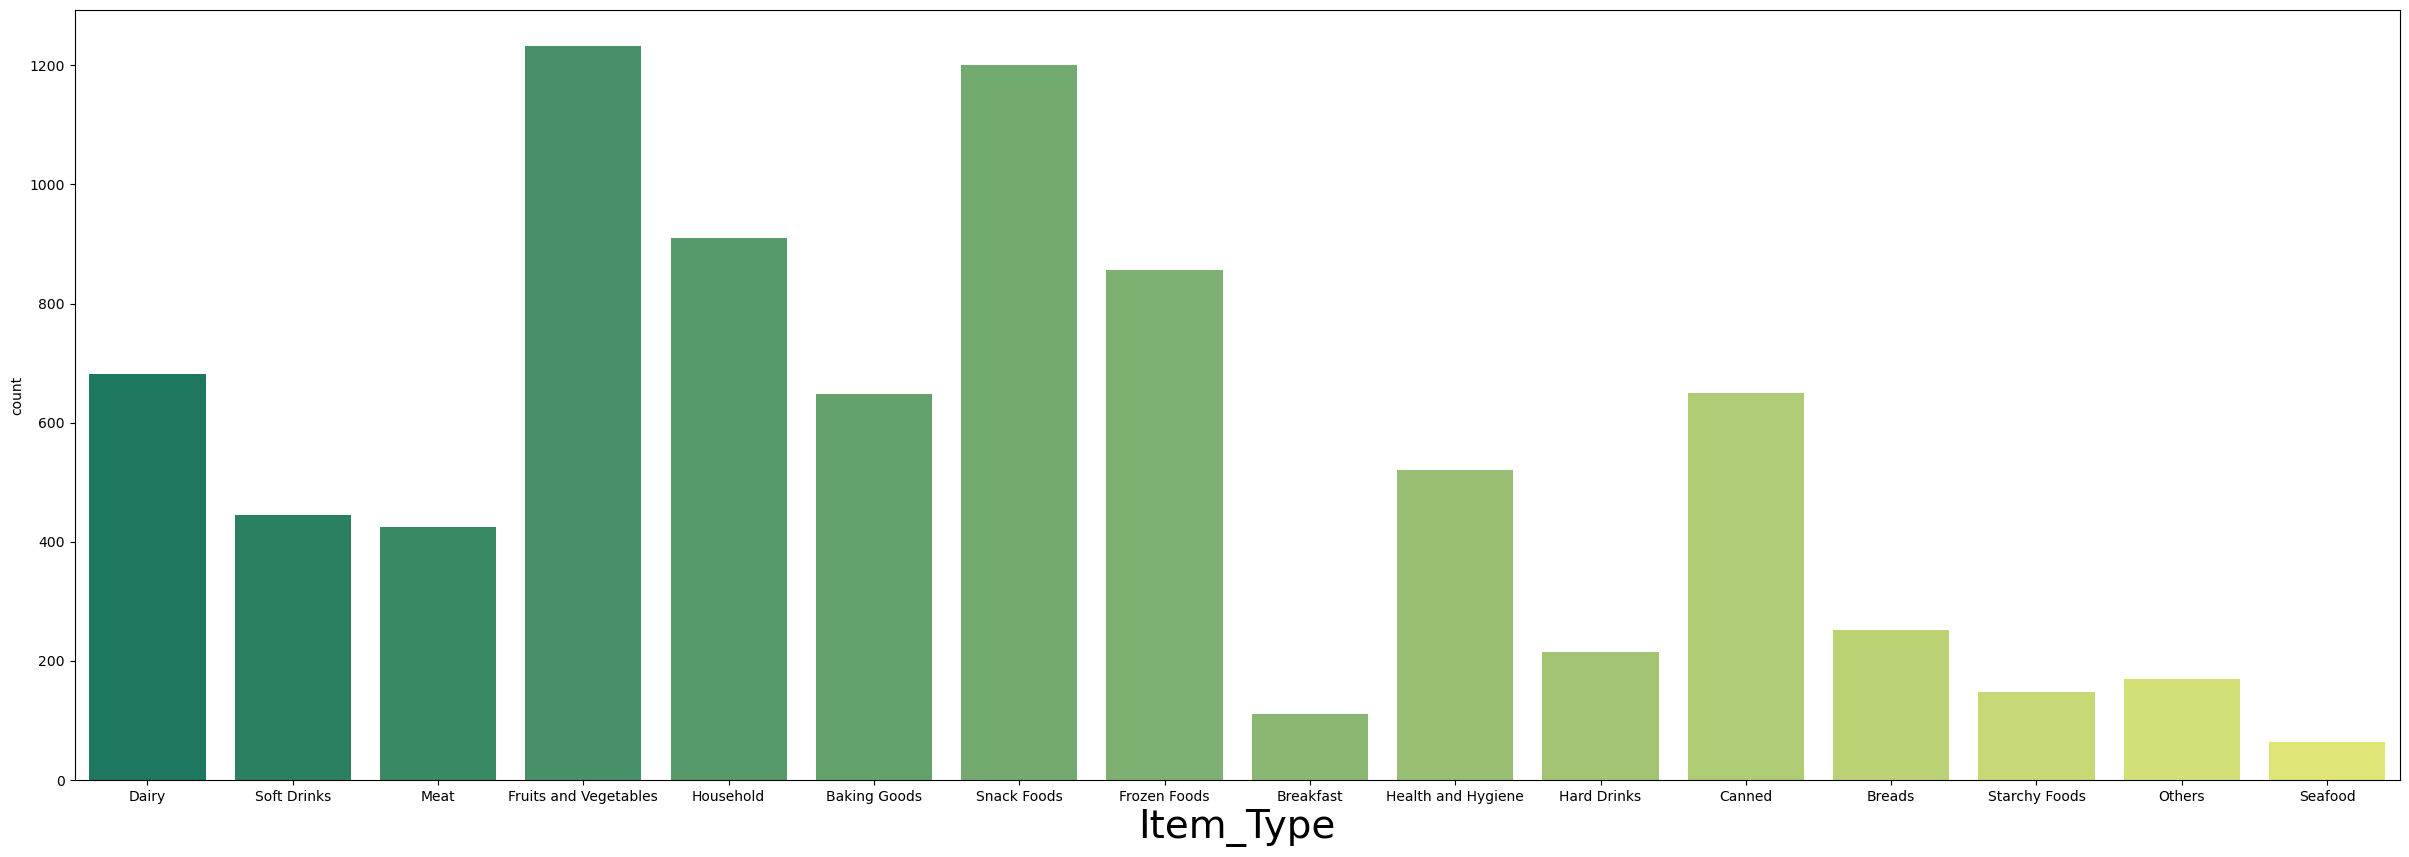

In [36]:
#SOME UNIVARIATE DATA VISUALIZATION
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type' , data=df_train ,palette='summer')
plt.xlabel('Item_Type', fontsize=28)
plt.show()

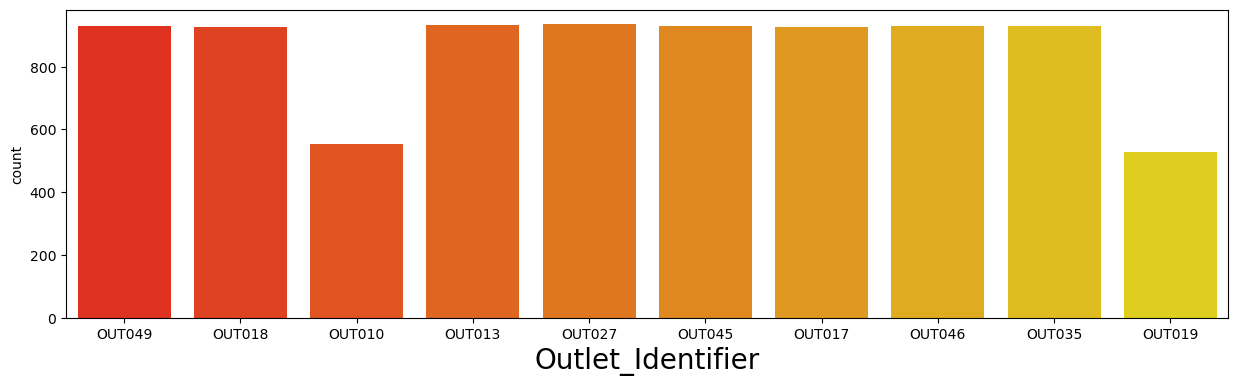

In [41]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=df_train ,palette='autumn')
plt.xlabel('Outlet_Identifier', fontsize=20)
plt.show()

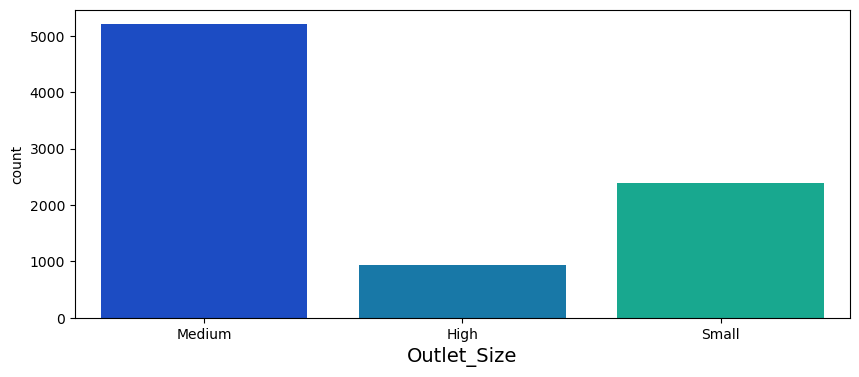

In [50]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=df_train ,palette='winter')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

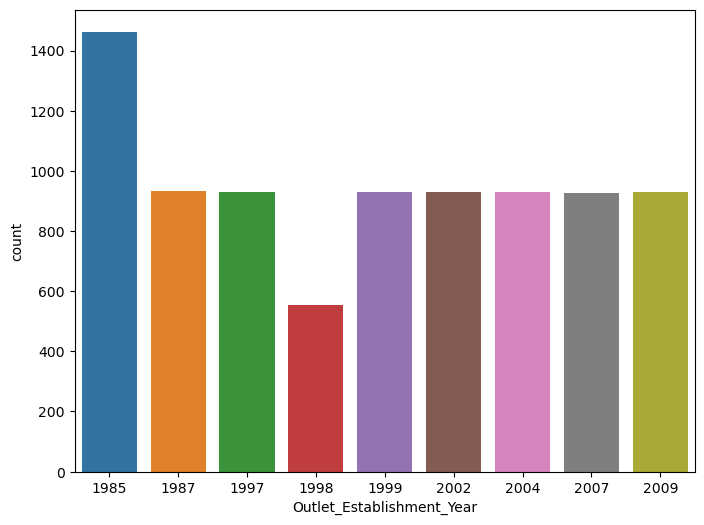

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(x=df_train['Outlet_Establishment_Year'])
plt.show()

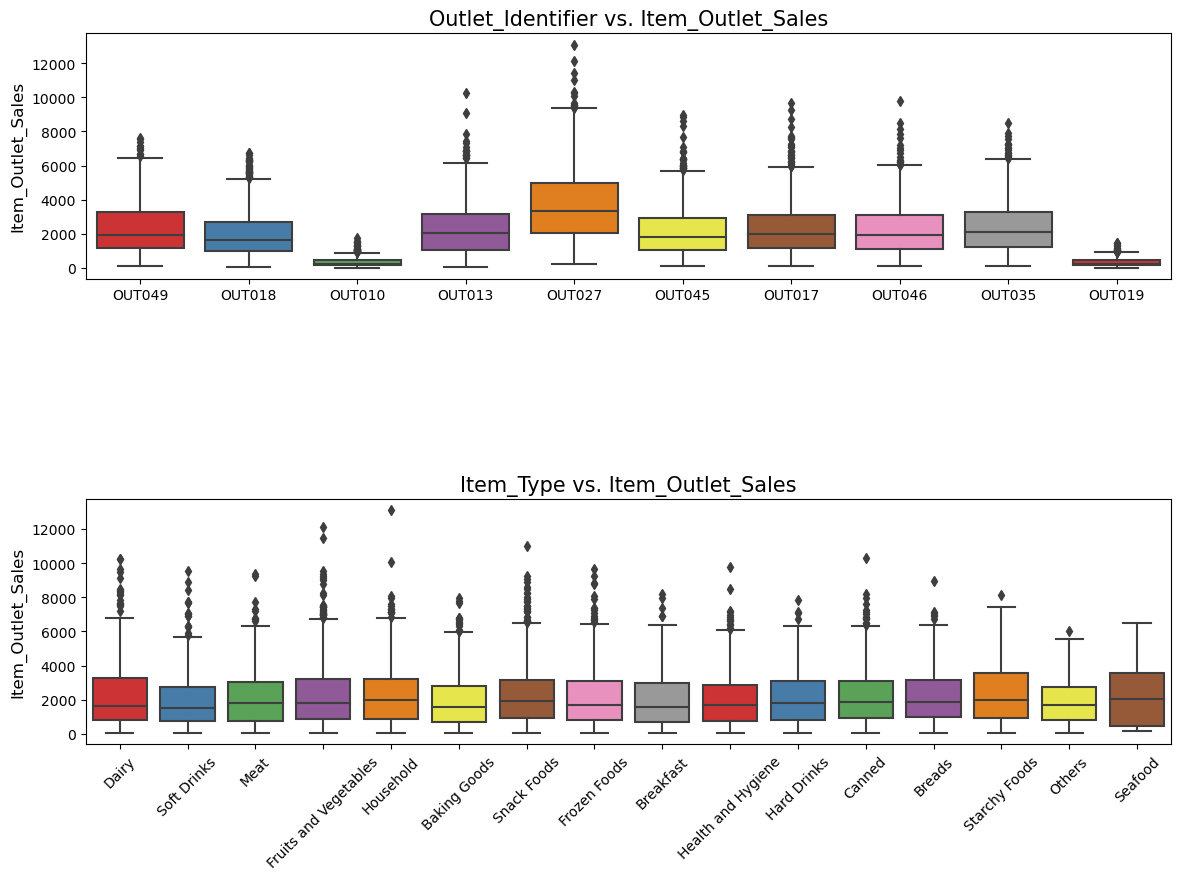

In [46]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df_train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

<Axes: xlabel='Item_Weight', ylabel='Density'>

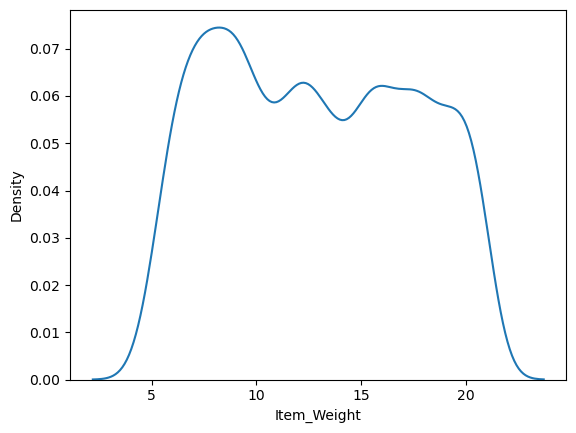

In [62]:
import seaborn as sns

sns.kdeplot(df_train['Item_Weight'])

Text(0, 0.5, 'Outlet_Identifier')

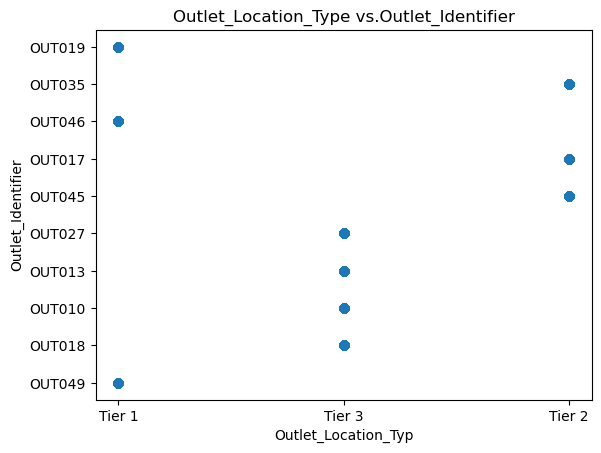

In [72]:
# Some Bivariate Analysis
plt.scatter(df_train['Outlet_Location_Type']  , df_train['Outlet_Identifier'])
plt.title('Outlet_Location_Type vs.Outlet_Identifier')
plt.xlabel('Outlet_Location_Typ')
plt.ylabel('Outlet_Identifier')

In [74]:
df_train.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27712\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_27712\4198902743.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=False, cmap='YlGnBu')


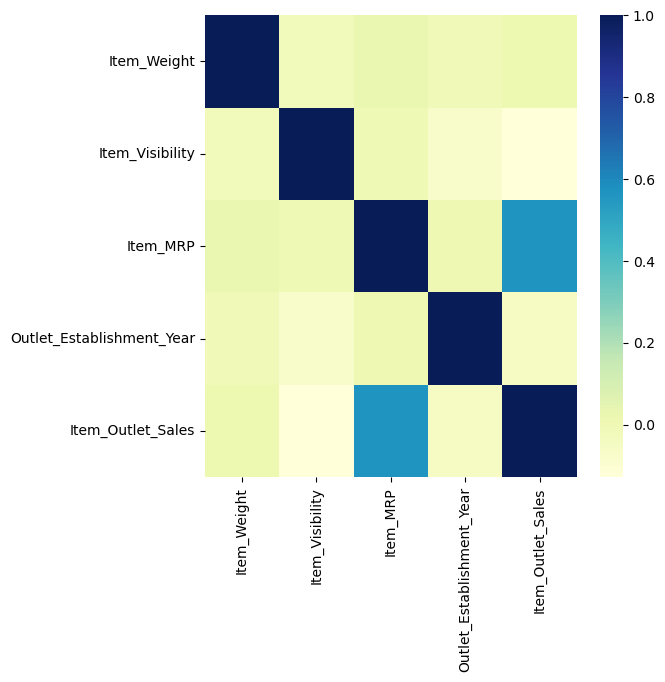

In [78]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_train.corr(), annot=False, cmap='YlGnBu')
plt.show()

In [79]:
df_train=df_train.replace({'Item_Fat_Content':{'Low Fat':1,'LF':1,'low fat':1,'reg':2,"Regular":2}})
print(df_train.head)

<bound method NDFrame.head of      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300                 1         0.016047   
1              DRC01        5.920                 2         0.019278   
2              FDN15       17.500                 1         0.016760   
3              FDX07       19.200                 2         0.000000   
4              NCD19        8.930                 1         0.000000   
...              ...          ...               ...              ...   
8518           FDF22        6.865                 1         0.056783   
8519           FDS36        8.380                 2         0.046982   
8520           NCJ29       10.600                 1         0.035186   
8521           FDN46        7.210                 2         0.145221   
8522           DRG01       14.800                 1         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092         

In [82]:
#Encoding Categorical Variables
df_train['Item_Fat_Content'].value_counts()

1    5517
2    3006
Name: Item_Fat_Content, dtype: int64

In [84]:
df_train.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)


In [89]:
#label encoding
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories in the desired order
ordinal_categories = ['Small', 'Medium']

# Create an instance of OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=[ordinal_categories], handle_unknown="use_encoded_value", unknown_value=2)

# Fit and transform the 'Outlet_Size' column
df_train['Outlet_Size_encoded'] = encoder.fit_transform(df_train[['Outlet_Size']])

# Display the encoded DataFrame
print(df_train[['Outlet_Size', 'Outlet_Size_encoded']])


     Outlet_Size  Outlet_Size_encoded
0         Medium                  1.0
1         Medium                  1.0
2         Medium                  1.0
3         Medium                  1.0
4           High                  2.0
...          ...                  ...
8518        High                  2.0
8519      Medium                  1.0
8520       Small                  0.0
8521      Medium                  1.0
8522       Small                  0.0

[8523 rows x 2 columns]


In [92]:
 # Convert df_train['Item_Type'] column to categorical data type
df_train['Item_Type'] = df_train['Item_Type'].astype('category')

# Assign label-encoded values to 'Item_Type_encoded' column
df_train['Item_Type_encoded'] = df_train['Item_Type'].cat.codes

# Display the encoded DataFrame
print(df_train[['Item_Type', 'Item_Type_encoded']])

                  Item_Type  Item_Type_encoded
0                     Dairy                  4
1               Soft Drinks                 14
2                      Meat                 10
3     Fruits and Vegetables                  6
4                 Household                  9
...                     ...                ...
8518            Snack Foods                 13
8519           Baking Goods                  0
8520     Health and Hygiene                  8
8521            Snack Foods                 13
8522            Soft Drinks                 14

[8523 rows x 2 columns]


In [93]:
unique = df_train['Item_Type_encoded'].unique()
print(unique)

[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]


In [100]:
from sklearn.linear_model import LinearRegression

X = df_train[['Item_MRP']]  # Independent variable
y = df_train['Item_Outlet_Sales']  # Dependent variable

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficient(s):", coefficients)
print("Intercept:", intercept)

Coefficient(s): [15.55302354]
Intercept: -11.575142825170587


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Random Forest
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# n_estimators is the number of trees in the random forest

# Train the model on the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(X_test, rf_predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(X_test, rf_predictions)
print("R-squared:", r2)

Mean Squared Error: 5634078.987966337
R-squared: -1511.3270099388862


In [106]:
pip install xgboost


  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)


In [112]:
import xgboost as xgb

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = XGBRegressor(n_estimators = 100, learning_rate=0.05)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [141]:
#Summary:
#-Firstly we studied the dataset i.e Big Mart Sales Analysis and understood the meaning of each columns.
#-Then we performed Exploratory Data Analysis on our dataset.
#-We plotted various Univariate and Bi-variate plots to study the relationship between various features.
#-Then we cleaned our data and also performed feature enginnering.
#-We trained our model and predicted values for Item_Outlet_sales.